Imports

In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from keras import utils as np_utils

import keras
import tensorflow
from keras import Sequential
import cv2 

Data treatment

- Train data

    -Images and labels

In [ ]:
images_train = "./data/Train/"


train_data=[]
train_labels=[]
classes = 43

for i in range(classes):
    img_path = os.path.join(images_train,str(i)) 

    for img in os.listdir(img_path):
        im = Image.open(img_path +'/'+ img)
        im = im.resize((48,48))
        im = np.array(im)
        train_data.append(im)
        train_labels.append(i)

train_data = np.array(train_data)


In [14]:
X_train = train_data
y_train = train_labels

Text(0.5, 1.0, 'Classe 0')

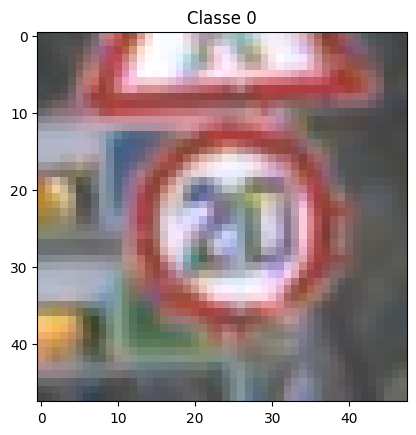

In [15]:
plt.imshow(X_train[1], cmap='grey')
plt.title('Classe ' + str(y_train[1]))

- Test data

    - Images

In [ ]:
images_test_path = "./data/Test/"

test_data=[]

test_imgs = os.listdir(images_test_path)

for img in test_imgs:
    im = Image.open(images_test_path +'/'+ img)
    im = im.resize((48,48))
    im = np.array(im)
    test_data.append(im)


test_data = np.array(test_data)

    - Labels

In [ ]:
#Read the labels in the Test csv
df = pd.read_csv('./data/Test.csv')

df = df.drop(columns=['Width','Height','Roi.X1','Roi.X2','Roi.Y2','Path','Roi.Y1'],axis=1,)

test_labels = df.to_numpy()

#Transfrom the array to just one line
test_labels = test_labels.flatten()

print(test_labels)

[16  1 38 ...  6  7 10]


In [18]:
X_test = test_data
y_test = test_labels

- Normalization

In [19]:
#Normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#One-hot enconding
y_test = np_utils.to_categorical(y_test, 43)
y_train = np_utils.to_categorical(y_train, 43)

- Resume

In [20]:
print(f"Total train images: {len(X_train)}")
print(f"Total train labels: {len(y_train)}")

print(f"Total test images: {len(X_test)}")
print(f"Total test labels: {len(y_test)}")

Total train images: 39209
Total train labels: 39209
Total test images: 12630
Total test labels: 12630


Convolutional neural network structure

In [21]:
CNN = Sequential()

CNN.add(keras.layers.InputLayer(shape= (48, 48, 3)))

CNN.add(keras.layers.Conv2D(filters = 32, kernel_size= (3, 3), activation='relu')) #Convolution
CNN.add(keras.layers.MaxPooling2D(pool_size= (2, 2))) #Pooling

CNN.add(keras.layers.Conv2D(filters = 64, kernel_size= (3, 3), activation='relu')) #Convolution
CNN.add(keras.layers.MaxPooling2D(pool_size= (2, 2))) #Pooling

CNN.add(keras.layers.Flatten()) #Flattening

#Dense neural network
CNN.add(keras.layers.Dense( units= 256, activation='relu'))
CNN.add(keras.layers.Dense( units= 128, activation='relu'))

CNN.add(keras.layers.Dense(units= 43, activation='softmax'))

CNN.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,696,491 (6.47 MB)

 Trainable params: 1,696,491 (6.47 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
CNN.fit(X_train, y_train,
        batch_size= 128,
        epochs=5)

Epoch 1/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.4707 - loss: 1.9991
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.9548 - loss: 0.1856
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9755 - loss: 0.0949
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.9870 - loss: 0.0511
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9881 - loss: 0.0413


In [24]:
result = CNN.evaluate(X_test, y_test)
print(result)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9157 - loss: 0.4175
[0.43051135540008545, 0.9144893288612366]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
14


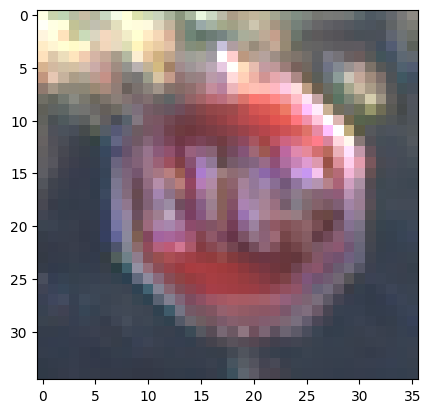

In [ ]:
# 93 / 111 / 132 -> STOP images
# 14 -> Categoria do STOP

test_img_2 = Image.open('./data/Test/00132.png')

#plt.imshow(test_img)
plt.imshow(test_img_2)

test_img_2 = test_img_2.resize((48,48))
test_img_2 = np.expand_dims(test_img_2, axis=0)

test_img_2 = np.array(test_img_2)

test_img_2 = test_img_2.astype('float32') / 255.0

prediction = CNN.predict(test_img_2)
prediction = np.argmax(prediction)

print(prediction)